In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Clasification Libraries
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
# Clustring Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In Python, you can turn off user warnings by using the warnings module and setting the appropriate warning filter. To disable all user warnings, you can use the following code:
```python
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
```
This code imports the warnings module and sets a filter to ignore any warnings of the UserWarning category. Keep in mind that ignoring all user warnings might hide important information, so it's generally better to address the underlying issues that cause the warnings instead of suppressing them entirely.

In [ ]:
#'''
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
#'''

# **2.Initilizing Functions**

* Show function is to demonstrate the graphs using matplotlib
* accuracy function is to gives the user feedback on thier Classification methods by thier test set of data
* C_accuracy function is to gives the user feedback on thier Clustring methods by thier test set of data 
* highlight_min function is to highlight the minimum values in the pandas excel environment

In [450]:
def show(title,X,Y,label,xlabel,ylabel):
    if title !="Diabetes sample view":
        plt.figure(figsize=(4,4))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # displaying the title
    plt.title(title)
    
    # display the graph
    plt.scatter(X, Y, c=label, s=2)

In [451]:
def accuracy (classification_method, method_pred,X_test,Y_test):
    # Print the accuracy of the classifier
    print("Accuracy:", classification_method.score(X_test,Y_test))

    # Print the confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_matrix(Y_test, method_pred)) #A confusion matrix is a table that is used to define the performance of a classification algorithm.

    print("\nClassification Report:")
    print(classification_report(Y_test, method_pred))

In [452]:
def C_accuracy(Pred,Y_test):
    no = np.count_nonzero(Pred == Y_test)
    l = len(Pred)
    print(f"Accuracy :{(no/l)*100}")

In [ ]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

# **3.Loading Dataset**
# *Ploting the Diabeties Dataset with and witout labels*

In [453]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None
plt.rcParams["figure.figsize"] = [8, 7]
plt.rcParams["figure.autolayout"] = True

# Define the CSV file path
csv_file = "Diabetes.csv"

# Read the CSV file into a pandas DataFrame
dataset = pd.read_csv(csv_file)

# Print the DataFrame
dataset.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
pregnancies,6,1,8,1,0,5,3,10,2,8,4,10,10,1,5,7,0,7,1,1,3,8,7,9,11,10,7,1,13,5,5,3,3,6,10,4,11,9,2,4,3,7,7,9,7,0,1,2,7,7,1,1,5,8,7,1,7,0,0,0,2,8,5,2,7,5,0,2,1,4,2,5,13,4,1,1,7,5,0,2,3,2,7,0,5,2,13,2,15,1,1,4,7,4,2,6,2,1,6,1,1,1,0,1,2,1,1,4,3,0,3,8,1,4,7,4,5,5,4,4,0,6,2,5,0,1,3,1,1,0,4,9,3,8,2,2,0,0,0,5,3,5,2,10,4,0,9,2,5,2,1,4,9,1,8,7,2,1,2,17,4,7,0,2,0,6,3,4,4,3,6,6,2,1,2,8,6,0,5,5,6,0,1,5,4,7,8,1,8,5,3,9,7,11,8,5,1,3,4,4,0,1,0,2,6,5,8,5,1,7,2,0,7,0,9,12,5,6,5,5,0,2,7,7,1,1,0,3,4,0,4,6,1,4,3,4,7,0,9,0,1,4,3,6,2,9,10,0,9,1,...,13,6,2,3,6,9,3,3,1,3,0,0,2,0,1,6,1,4,0,0,0,3,8,3,10,4,1,8,5,4,1,4,1,3,6,1,1,7,1,8,11,11,6,0,1,6,0,2,1,6,4,0,3,2,3,2,1,1,6,2,10,2,0,6,12,8,8,1,8,6,3,0,11,2,3,2,6,0,0,1,1,1,1,6,1,7,4,1,1,1,0,1,3,3,7,6,11,3,6,2,9,0,2,2,6,0,2,4,0,0,5,4,7,0,2,1,10,13,5,2,7,1,0,4,6,4,3,2,1,0,11,0,1,1,5,2,1,2,2,1,11,3,10,1,8,9,6,1,4,10,6,9,6,1,10,3,8,6,9,0,3,2,2,0,0,4,5,2,3,1,1,1,8,13,2,7,2,7,3,0,4,4,2,6,1,2,4,6,10,2,9,2,3,5,10,0,3,7,3,10,1,5,4,1,1,5,1,4,1,0,2,2,3,8,2,2,2,4,0,8,2,1,11,3,1,9,13,12,1,1,3,6,4,1,3,0,8,1,7,0,1,6,2,9,9,10,2,5,1,1
glucose,148,85,183,89,137,116,78,115,197,125,110,168,139,189,166,100,118,107,103,115,126,99,196,119,143,125,147,97,145,117,109,158,88,92,122,103,138,102,90,111,180,133,106,171,159,180,146,71,103,105,103,101,88,176,150,73,187,100,146,105,84,133,44,141,114,99,109,109,95,146,100,139,126,129,79,0,62,95,131,112,113,74,83,101,137,110,106,100,136,107,80,123,81,134,142,144,92,71,93,122,163,151,125,81,85,126,96,144,83,95,171,155,89,76,160,146,124,78,97,99,162,111,107,132,113,88,120,118,117,105,173,122,170,84,96,125,100,93,129,105,128,106,108,108,154,102,57,106,147,90,136,114,156,153,188,152,99,109,88,163,151,102,114,100,131,104,148,120,110,111,102,134,87,79,75,179,85,129,143,130,87,119,0,73,141,194,181,128,109,139,111,123,159,135,85,158,105,107,109,148,113,138,108,99,103,111,196,162,96,184,81,147,179,140,112,151,109,125,85,112,177,158,119,142,100,87,101,162,197,117,142,134,79,122,74,171,181,179,164,104,91,91,139,119,146,184,122,165,124,111,...,76,129,68,124,114,130,125,87,97,116,117,111,122,107,86,91,77,132,105,57,127,129,100,128,90,84,88,186,

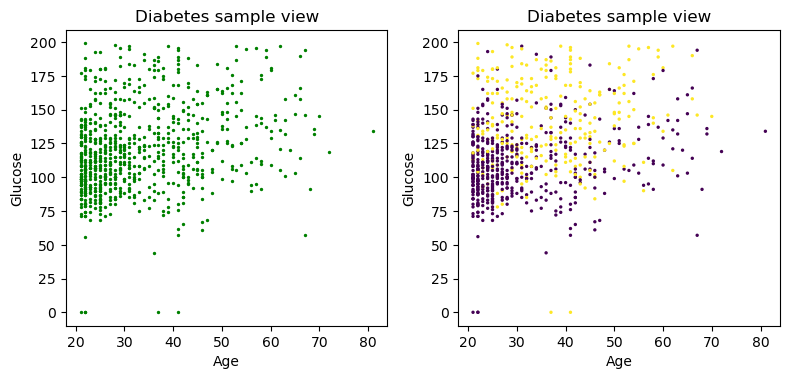

In [454]:
plt.subplot(2,2,1)
show(title="Diabetes sample view", X= dataset.age, Y= dataset.glucose, label="green" ,xlabel="Age",ylabel="Glucose")
plt.subplot(2,2,2)
show(title="Diabetes sample view", X= dataset.age, Y= dataset.glucose, label=dataset.outcome ,xlabel="Age",ylabel="Glucose")

# **4.preprocessing Dataset**
- ### *checking for redundent and irrelevent values*
- ### *clean these values and replace None type value*
- ### *replace the value with the value of the nearest neibours (knn)*

In [455]:
dataset.T.style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

In [456]:
dataset[["glucose","bloodpressure","skinthickness","insulin","bmi"]] = dataset[["glucose","bloodpressure","skinthickness","insulin","bmi"]].replace(0,np.NaN)
dataset.isnull().sum()


pregnancies                   0
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64

In [457]:
scaler = RobustScaler()
C_dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

In [458]:

imputer = KNNImputer(n_neighbors=3)
C_dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)
C_dataset.T.style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

In [459]:
C_dataset.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

#**Split the data into train and test sets**

In [460]:
X = C_dataset.iloc[:,:-1]
y = C_dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **5.Classification**
## **5.1.KNN: K Nearest Neighbour**

Accuracy: 0.7135416666666666

Confusion Matrix:
[[103  20]
 [ 35  34]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       123
         1.0       0.63      0.49      0.55        69

    accuracy                           0.71       192
   macro avg       0.69      0.67      0.67       192
weighted avg       0.70      0.71      0.70       192



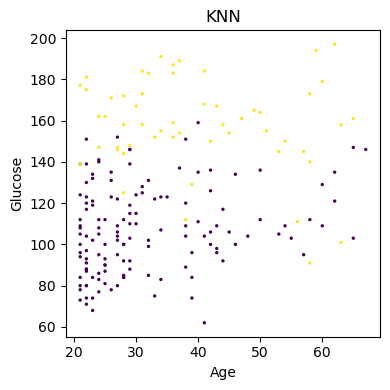

In [461]:
knn = KNeighborsClassifier(n_neighbors=16)

# Train the classifier using the training set
knn.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
knn_pred = knn.predict(X_test)

accuracy (knn, knn_pred,X_test,y_test)
show(title="KNN", X=X_test.age, Y=X_test.glucose, label=knn_pred,xlabel="Age",ylabel="Glucose")

## **5.2.SVM: Support Vector Machine**

Accuracy: 0.7447916666666666

Confusion Matrix:
[[101  22]
 [ 27  42]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       123
         1.0       0.66      0.61      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192



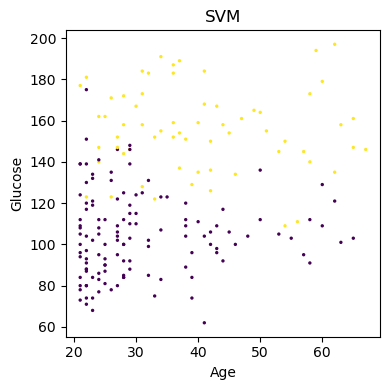

In [462]:
svm = SVC(kernel='linear', C=1,probability=True)

# Train the classifier using the training set
svm.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
svm_pred = svm.predict(X_test)

accuracy (svm, svm_pred,X_test,y_test)
show(title="SVM", X=X_test.age, Y=X_test.glucose, label=svm_pred,xlabel="Age",ylabel="Glucose")

## **5.3.NN: Nureal Network (Multilayer)**

Accuracy: 0.640625

Confusion Matrix:
[[123   0]
 [ 69   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78       123
         1.0       0.00      0.00      0.00        69

    accuracy                           0.64       192
   macro avg       0.32      0.50      0.39       192
weighted avg       0.41      0.64      0.50       192



d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


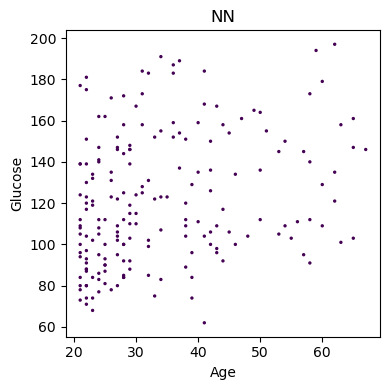

In [463]:
NN = MLPClassifier(hidden_layer_sizes=(6,), activation='identity', alpha= 0.1 ,max_iter= 550) # can choose between identity(%94), logistic(%93.6), tanh(%94), relu(%94),
NN.fit(X_train, y_train)
NN_pred = NN.predict(X_test)

accuracy (NN, NN_pred,X_test,y_test)
show(title="NN", X=X_test.age, Y=X_test.glucose, label=NN_pred,xlabel="Age",ylabel="Glucose")

# **6.Clustering**
## **6.1.Hierarchical Clustering**

Accuracy :66.14583333333334


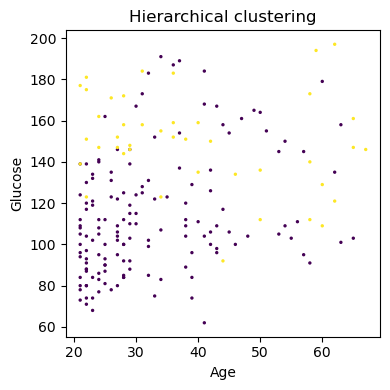

In [464]:
n_clusters = 2
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
hierarchical_clustering.fit(X_train, y_train)
HC_pred = hierarchical_clustering.fit_predict(X_test)
C_accuracy(HC_pred,y_test)
show(title="Hierarchical clustering", X=X_test.age, Y=X_test.glucose, label=HC_pred,xlabel="Age",ylabel="Glucose")

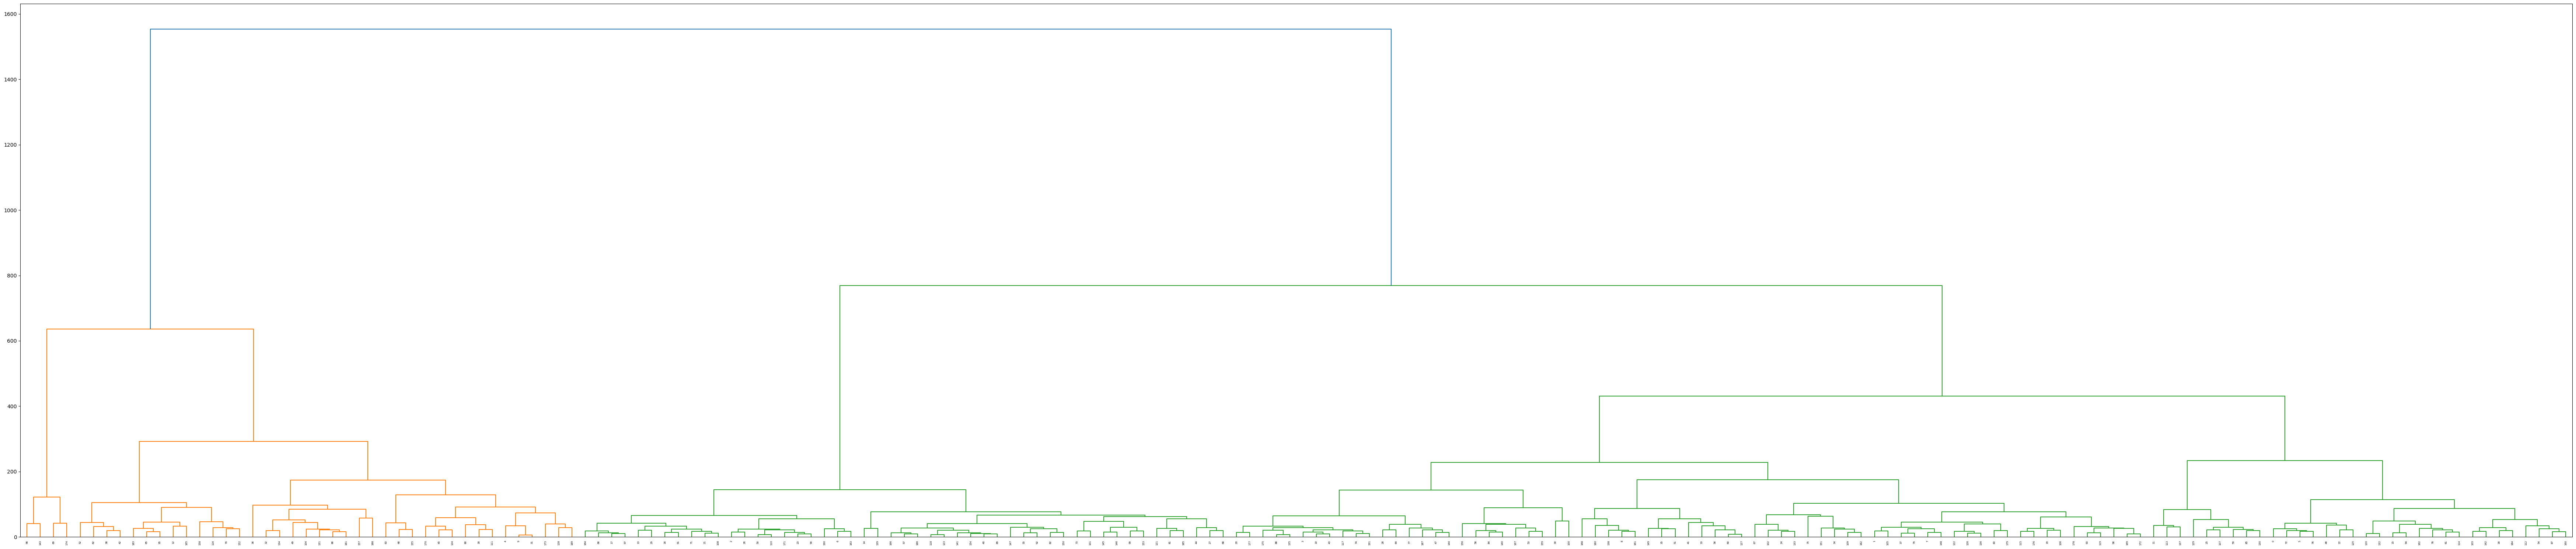

In [465]:
plt.figure(figsize=(70, 15))
linkage_data = linkage(X_test, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

## **6.2.Kmeans Clustering**

Accuracy :30.208333333333332


d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


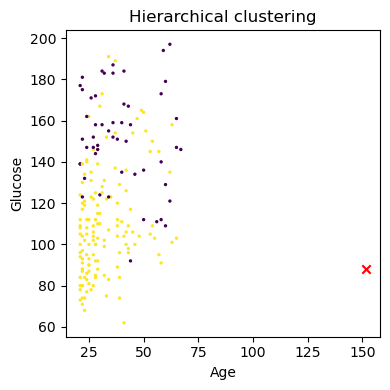

In [466]:
n_clusters = 2
kmeans_clustering = KMeans(n_clusters=n_clusters, n_init='auto', init= "k-means++")
kmeans_clustering.fit(X_train, y_train)
KM_pred = kmeans_clustering.fit_predict(X_test)

X_test_kmeans = kmeans_clustering.transform(X_test)
test_centers = np.mean(X_test_kmeans, axis=0).reshape(1, -1)

C_accuracy(KM_pred,y_test)
show(title="Hierarchical clustering", X=X_test.age, Y=X_test.glucose, label=KM_pred,xlabel="Age",ylabel="Glucose")
plt.scatter(test_centers[:, 0], test_centers[:, 1],marker='x', color='red')

## **6.3.DBSCAN Clustering : Density Based Spatial Clustring**

d:\ProgramFiles\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy :69.27083333333334


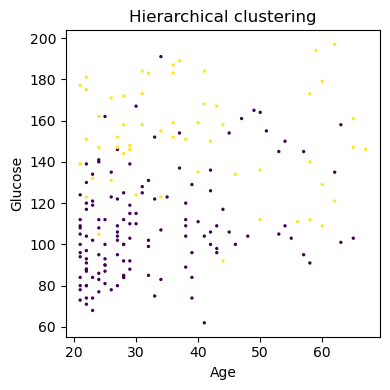

In [467]:
eps=10
min_samples=15
dbscan_clustering = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_clustering.fit(X_train, y_train)
dbscan_pred = kmeans_clustering.fit_predict(X_test)
C_accuracy(dbscan_pred,y_test)
show(title="Hierarchical clustering", X=X_test.age, Y=X_test.glucose, label=dbscan_pred,xlabel="Age",ylabel="Glucose")